# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [59]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

from pprint import pprint
# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [7]:
!pip install citipy

  Using cached citipy-0.0.6-py3-none-any.whl


### Generate the Cities List by Using the `citipy` Library

In [9]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 583


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [61]:
# Set the API base URL
base_url = "http://api.openweathermap.org/data/2.5/weather?"

from pprint import pprint

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{base_url}q={city}&appid={weather_api_key}&units=imperial" 

    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data         
        city_weather = requests.get(city_url).json()   

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
 
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ciudad lazaro cardenas
Processing Record 2 of Set 1 | playa del carmen
Processing Record 3 of Set 1 | norcasia
Processing Record 4 of Set 1 | cable beach
City not found. Skipping...
Processing Record 5 of Set 1 | grytviken
Processing Record 6 of Set 1 | qaqortoq
Processing Record 7 of Set 1 | port-aux-francais
Processing Record 8 of Set 1 | chonchi
Processing Record 9 of Set 1 | pingliang
Processing Record 10 of Set 1 | yangor
City not found. Skipping...
Processing Record 11 of Set 1 | adamstown
Processing Record 12 of Set 1 | port-gentil
Processing Record 13 of Set 1 | pangkalanbuun
Processing Record 14 of Set 1 | jamestown
Processing Record 15 of Set 1 | cargados carajos
City not found. Skipping...
Processing Record 16 of Set 1 | waitangi
Processing Record 17 of Set 1 | nonsan
Processing Record 18 of Set 1 | teteven
Processing Record 19 of Set 1 | albany
Processing Record 20 of Set 1 | ust-nera

Processing Record 38 of Set 4 | kone
Processing Record 39 of Set 4 | batamshinskiy
Processing Record 40 of Set 4 | puning
Processing Record 41 of Set 4 | bathurst
Processing Record 42 of Set 4 | agadez
Processing Record 43 of Set 4 | teknaf
Processing Record 44 of Set 4 | 'anah
City not found. Skipping...
Processing Record 45 of Set 4 | tiksi
Processing Record 46 of Set 4 | ar rumaythah
Processing Record 47 of Set 4 | wailua homesteads
Processing Record 48 of Set 4 | arno
Processing Record 49 of Set 4 | kittila
Processing Record 0 of Set 5 | yuzhno-kurilsk
Processing Record 1 of Set 5 | wuwei
Processing Record 2 of Set 5 | carnarvon
Processing Record 3 of Set 5 | tabira
Processing Record 4 of Set 5 | jatibarang
Processing Record 5 of Set 5 | lorengau
Processing Record 6 of Set 5 | erenhot
Processing Record 7 of Set 5 | arteche
Processing Record 8 of Set 5 | el hadjira
Processing Record 9 of Set 5 | salinopolis
Processing Record 10 of Set 5 | sitangkai
Processing Record 11 of Set 5 | ta

Processing Record 33 of Set 8 | utrik
Processing Record 34 of Set 8 | neryungri
Processing Record 35 of Set 8 | sungailiat
Processing Record 36 of Set 8 | howard springs
Processing Record 37 of Set 8 | sitka
Processing Record 38 of Set 8 | nago
Processing Record 39 of Set 8 | lerwick
Processing Record 40 of Set 8 | motueka
Processing Record 41 of Set 8 | n'zeto
Processing Record 42 of Set 8 | san patricio
Processing Record 43 of Set 8 | dawei
Processing Record 44 of Set 8 | le hocq
City not found. Skipping...
Processing Record 45 of Set 8 | broome
Processing Record 46 of Set 8 | klimovo
Processing Record 47 of Set 8 | clovis
Processing Record 48 of Set 8 | ladnun
Processing Record 49 of Set 8 | sharlyk
Processing Record 0 of Set 9 | bakhchysarai
Processing Record 1 of Set 9 | fada
Processing Record 2 of Set 9 | nantucket
Processing Record 3 of Set 9 | azadshahr
Processing Record 4 of Set 9 | north battleford
Processing Record 5 of Set 9 | zouerate
Processing Record 6 of Set 9 | olyokmi

Processing Record 22 of Set 12 | homer
Processing Record 23 of Set 12 | lapseki
Processing Record 24 of Set 12 | ramhormoz
Processing Record 25 of Set 12 | qionghai
Processing Record 26 of Set 12 | huixquilucan
Processing Record 27 of Set 12 | ghat
Processing Record 28 of Set 12 | khilok
Processing Record 29 of Set 12 | flying fish cove
Processing Record 30 of Set 12 | uyskoye
Processing Record 31 of Set 12 | vredendal
Processing Record 32 of Set 12 | twon-brass
-----------------------------
Data Retrieval Complete      
-----------------------------


In [19]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)


# Show Record Count
pprint(city_data_df.count())

City          558
Lat           558
Lng           558
Max Temp      558
Humidity      558
Cloudiness    558
Wind Speed    558
Country       558
Date          558
dtype: int64


In [44]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ciudad lazaro cardenas,17.9583,-102.2000,87.75,47,93,2.77,MX,1701884416
1,playa del carmen,20.6274,-87.0799,84.88,72,75,16.11,MX,1701884416
2,norcasia,5.5778,-74.8852,86.88,54,100,3.00,CO,1701884416
3,grytviken,-54.2811,-36.5092,32.99,79,87,22.21,GS,1701884416
4,qaqortoq,60.7167,-46.0333,39.34,55,100,19.64,GL,1701884416


In [23]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [24]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ciudad lazaro cardenas,17.9583,-102.2000,87.75,47,93,2.77,MX,1701884416
1,playa del carmen,20.6274,-87.0799,84.88,72,75,16.11,MX,1701884416
2,norcasia,5.5778,-74.8852,86.88,54,100,3.00,CO,1701884416
3,grytviken,-54.2811,-36.5092,32.99,79,87,22.21,GS,1701884416
4,qaqortoq,60.7167,-46.0333,39.34,55,100,19.64,GL,1701884416


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

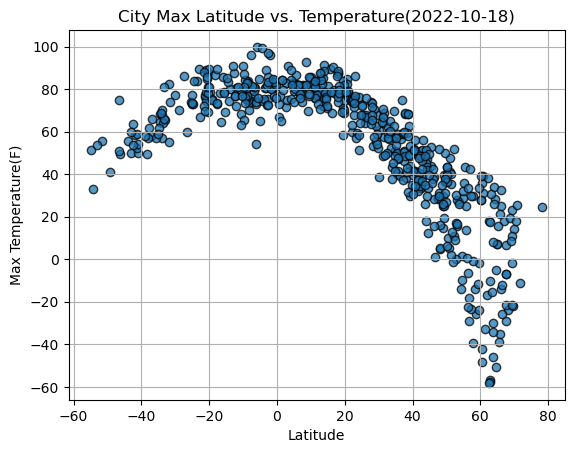

In [39]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE

from datetime import datetime

# set datetime
date = datetime(2022, 10, 18)

plt.scatter( city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black", alpha = 0.75)

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Max Latitude vs. Temperature(2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(F)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

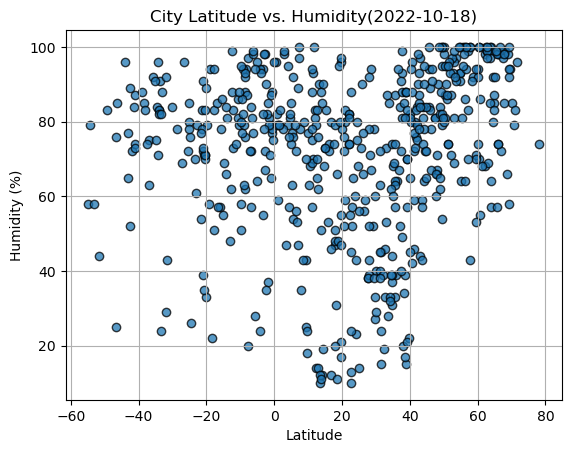

In [46]:
# Build scatter plot for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", alpha=0.75)

# Set chart title and labels
plt.title("City Latitude vs. Humidity(2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Set grid lines
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

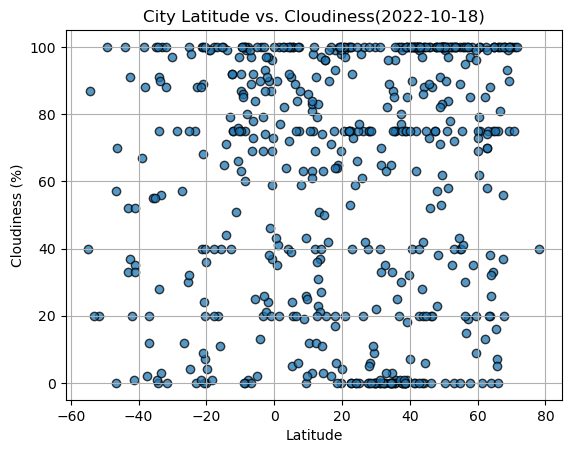

In [47]:
# Build scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", alpha=0.75)

# Set chart title and labels
plt.title("City Latitude vs. Cloudiness(2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Set grid lines
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

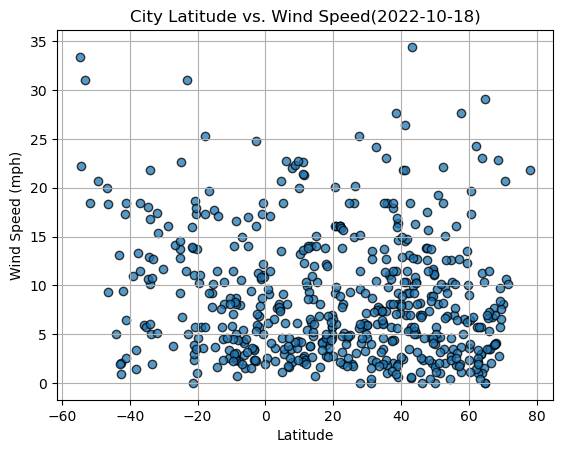

In [51]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black", alpha=0.75)

# Set chart title and labels
plt.title("City Latitude vs. Wind Speed(2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Set grid lines
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [64]:
# Define a function to create Linear Regression plots
(slope, intercept, r_value, p_value, std_err) = linregress(city_data_df["Lat"], city_data_df["Wind Speed"])
def linear_regression_and_print(x, y):
    # Perform linear regression
    (slope, intercept, r_value, p_value, std_err) = linregress(x, y)

    # Print the results
    print(f"Slope: {slope}")
    print(f"Intercept: {intercept}")
    print(f"R-value (Correlation coefficient): {r_value}")
    print(f"P-value: {p_value}")
    print(f"Standard Error: {std_err}")

# Example usage:
x = city_data_df["Lat"]
y = city_data_df["Wind Speed"]
linear_regression_and_print(x, y)


Slope: -0.029099589842279137
Intercept: 9.186883952666204
R-value (Correlation coefficient): -0.14090838907251652
P-value: 0.0008446136334645929
Standard Error: 0.00867077162696981


In [66]:
# YOUR CODE HERE
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ciudad lazaro cardenas,17.9583,-102.2000,87.75,47,93,2.77,MX,1701884416
1,playa del carmen,20.6274,-87.0799,84.88,72,75,16.11,MX,1701884416
2,norcasia,5.5778,-74.8852,86.88,54,100,3.00,CO,1701884416
3,grytviken,-54.2811,-36.5092,32.99,79,87,22.21,GS,1701884416
4,qaqortoq,60.7167,-46.0333,39.34,55,100,19.64,GL,1701884416


In [67]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ciudad lazaro cardenas,17.9583,-102.2000,87.75,47,93,2.77,MX,1701884416
1,playa del carmen,20.6274,-87.0799,84.88,72,75,16.11,MX,1701884416
2,norcasia,5.5778,-74.8852,86.88,54,100,3.00,CO,1701884416
4,qaqortoq,60.7167,-46.0333,39.34,55,100,19.64,GL,1701884416
7,pingliang,35.5392,106.6861,39.99,33,0,7.40,CN,1701884417


In [68]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,grytviken,-54.2811,-36.5092,32.99,79,87,22.21,GS,1701884416
5,port-aux-francais,-49.3500,70.2167,41.25,83,100,20.65,TF,1701884417
6,chonchi,-42.6128,-73.8092,63.61,52,37,2.06,CL,1701884417
8,adamstown,-25.0660,-130.1015,72.84,80,100,13.71,PN,1701884417
9,port-gentil,-0.7193,8.7815,81.21,77,96,11.03,GA,1701884417


###  Temperature vs. Latitude Linear Regression Plot

Temperature vs. Latitude on Northern Hemisphere's  r-value is: -0.8633300071631849


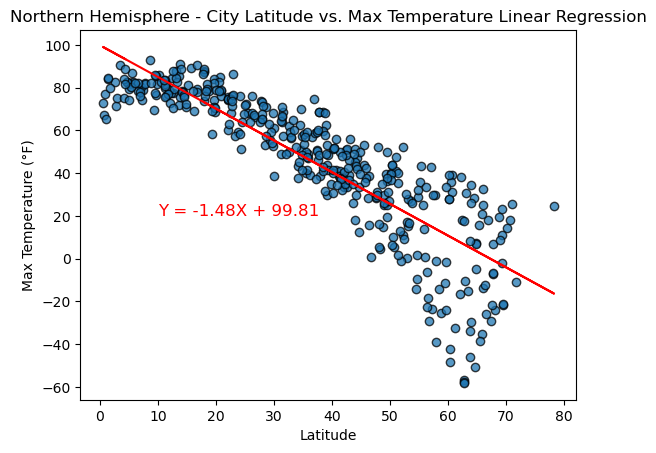

In [81]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
# Perform linear regression
(slope, intercept, r_value, p_value, std_err) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])

# Calculate the regression line
regress_values = northern_hemi_df["Lat"] * slope + intercept

# Create scatter plot
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], edgecolors="black", alpha=0.75)

# Plot the regression line
plt.plot(northern_hemi_df["Lat"], regress_values, color="red")

# Set chart title and labels
plt.title("Northern Hemisphere - City Latitude vs. Max Temperature Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°F)")

# Display the correlation coefficient
print(f"Temperature vs. Latitude on Northern Hemisphere's  r-value is: {r_value}")

# Add regression equation as text in the plot
equation = f"Y = {slope:.2f}X + {intercept:.2f}"
plt.annotate(equation, (10, 20), fontsize=12, color="red")


# Save the figure
plt.savefig("output_data/Northern_Hemisphere_Latitude_vs_Temperature_Linear_Regression.png")

# Show plot
plt.show()

Temperature vs. Latitude on Southern Hemisphere's r-value is: 0.7184486652804739


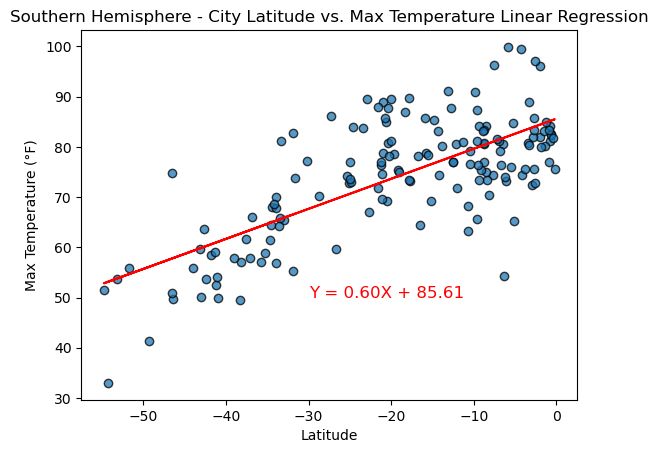

In [82]:
# Perform linear regression
(slope, intercept, r_value, p_value, std_err) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])

# Calculate the regression line
regress_values = southern_hemi_df["Lat"] * slope + intercept

# Create scatter plot
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], edgecolors="black", alpha=0.75)

# Plot the regression line
plt.plot(southern_hemi_df["Lat"], regress_values, color="red")

# Set chart title and labels
plt.title("Southern Hemisphere - City Latitude vs. Max Temperature Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°F)")

# Display the correlation coefficient
print(f"Temperature vs. Latitude on Southern Hemisphere's r-value is: {r_value}")

# Add regression equation as text in the plot
equation = f"Y = {slope:.2f}X + {intercept:.2f}"
plt.annotate(equation, (-30, 50), fontsize=12, color="red")

# Save the figure
plt.savefig("output_data/Southern_Hemisphere_Latitude_vs_Temperature_Linear_Regression.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

Humidity vs. Latitude on Northern Hemisphere r-value is: 0.3698587535521219


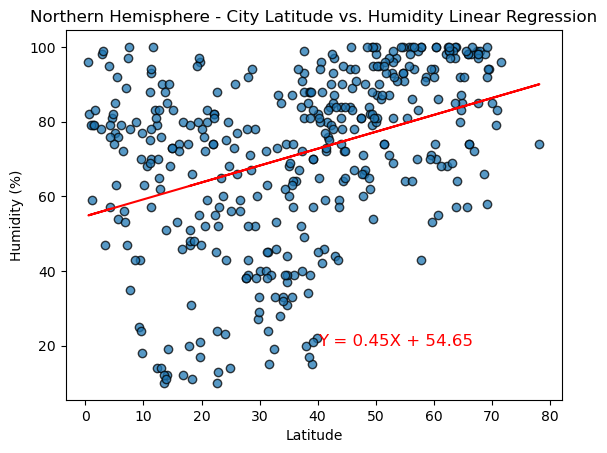

In [83]:
# Northern Hemisphere DataFrame (Latitude >= 0)에서 데이터 추출
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Perform linear regression
(slope, intercept, r_value, p_value, std_err) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])

# Calculate the regression line
regress_values = northern_hemi_df["Lat"] * slope + intercept

# Create scatter plot
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], edgecolors="black", alpha=0.75)

# Plot the regression line
plt.plot(northern_hemi_df["Lat"], regress_values, color="red")

# Set chart title and labels
plt.title("Northern Hemisphere - City Latitude vs. Humidity Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Display the correlation coefficient
print(f"Humidity vs. Latitude on Northern Hemisphere r-value is: {r_value}")

# Add regression equation as text in the plot
equation = f"Y = {slope:.2f}X + {intercept:.2f}"
plt.annotate(equation, (40, 20), fontsize=12, color="red")

# Save the figure
plt.savefig("output_data/Northern_Hemisphere_Latitude_vs_Humidity_Linear_Regression.png")

# Show plot
plt.show()

Humidity vs. Latitude on Southern Hemisphere r-value is : 0.08818097840857275


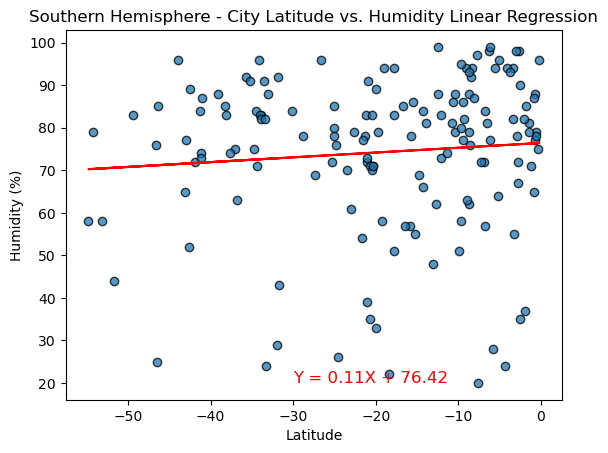

In [84]:
# Southern Hemisphere DataFrame (Latitude < 0)에서 데이터 추출
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Perform linear regression
(slope, intercept, r_value, p_value, std_err) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])

# Calculate the regression line
regress_values = southern_hemi_df["Lat"] * slope + intercept

# Create scatter plot
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], edgecolors="black", alpha=0.75)

# Plot the regression line
plt.plot(southern_hemi_df["Lat"], regress_values, color="red")

# Set chart title and labels
plt.title("Southern Hemisphere - City Latitude vs. Humidity Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Display the correlation coefficient
print(f"Humidity vs. Latitude on Southern Hemisphere r-value is : {r_value}")

# Add regression equation as text in the plot
equation = f"Y = {slope:.2f}X + {intercept:.2f}"
plt.annotate(equation, (-30, 20), fontsize=12, color="red")

# Save the figure
plt.savefig("output_data/Southern_Hemisphere_Latitude_vs_Humidity_Linear_Regression.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

Cloudiness vs. Latitude Linear Regression on Northern Hemisphere r-value is: 0.11594201852546625


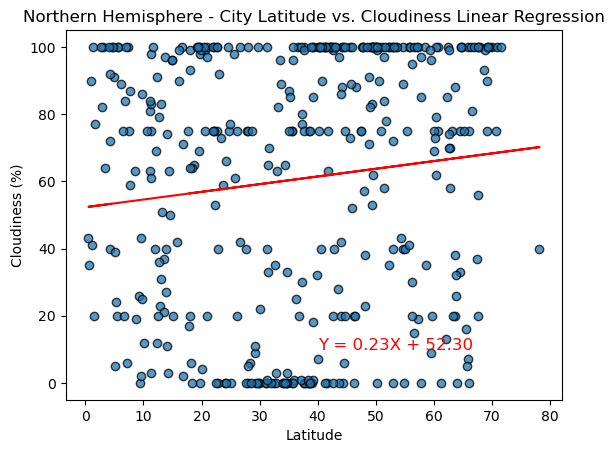

In [85]:
# Perform linear regression
(slope, intercept, r_value, p_value, std_err) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])

# Calculate the regression line
regress_values = northern_hemi_df["Lat"] * slope + intercept

# Create scatter plot
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], edgecolors="black", alpha=0.75)

# Plot the regression line
plt.plot(northern_hemi_df["Lat"], regress_values, color="red")

# Set chart title and labels
plt.title("Northern Hemisphere - City Latitude vs. Cloudiness Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Display the correlation coefficient
print(f"Cloudiness vs. Latitude Linear Regression on Northern Hemisphere r-value is: {r_value}")

# Add regression equation as text in the plot
equation = f"Y = {slope:.2f}X + {intercept:.2f}"
plt.annotate(equation, (40, 10), fontsize=12, color="red")

# Save the figure
plt.savefig("output_data/Northern_Hemisphere_Latitude_vs_Cloudiness_Linear_Regression.png")

# Show plot
plt.show()

Cloudiness vs. Latitude Linear Regression on Southern Hemisphere r-value is: 0.20106734676540444


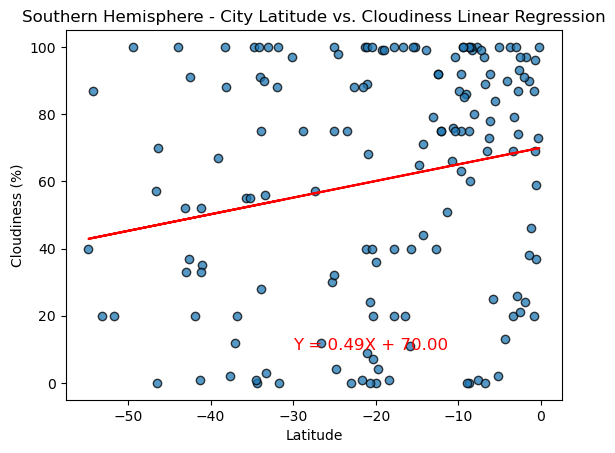

In [86]:
# Perform linear regression
(slope, intercept, r_value, p_value, std_err) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])

# Calculate the regression line
regress_values = southern_hemi_df["Lat"] * slope + intercept

# Create scatter plot
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], edgecolors="black", alpha=0.75)

# Plot the regression line
plt.plot(southern_hemi_df["Lat"], regress_values, color="red")

# Set chart title and labels
plt.title("Southern Hemisphere - City Latitude vs. Cloudiness Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Display the correlation coefficient
print(f"Cloudiness vs. Latitude Linear Regression on Southern Hemisphere r-value is: {r_value}")

# Add regression equation as text in the plot
equation = f"Y = {slope:.2f}X + {intercept:.2f}"
plt.annotate(equation, (-30, 10), fontsize=12, color="red")

# Save the figure
plt.savefig("output_data/Southern_Hemisphere_Latitude_vs_Cloudiness_Linear_Regression.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

Wind Speed vs. Latitude Linear on Northern Hemisphere r-value is: -0.030776291341723112


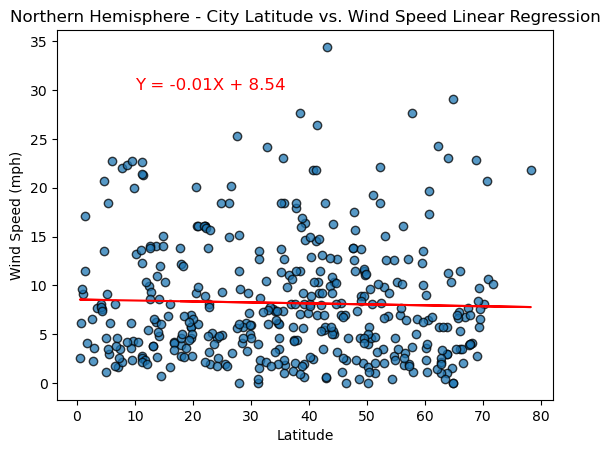

In [87]:
# Northern Hemisphere DataFrame (Latitude >= 0)에서 데이터 추출
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Perform linear regression
(slope, intercept, r_value, p_value, std_err) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])

# Calculate the regression line
regress_values = northern_hemi_df["Lat"] * slope + intercept

# Create scatter plot
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], edgecolors="black", alpha=0.75)

# Plot the regression line
plt.plot(northern_hemi_df["Lat"], regress_values, color="red")

# Set chart title and labels
plt.title("Northern Hemisphere - City Latitude vs. Wind Speed Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Display the correlation coefficient
print(f"Wind Speed vs. Latitude Linear on Northern Hemisphere r-value is: {r_value}")

# Add regression equation as text in the plot
equation = f"Y = {slope:.2f}X + {intercept:.2f}"
plt.annotate(equation, (10, 30), fontsize=12, color="red")

# Save the figure
plt.savefig("output_data/Northern_Hemisphere_Latitude_vs_Wind_Speed_Linear_Regression.png")

# Show plot
plt.show()

Wind Speed vs. Latitude Linear on Northern Hemisphere r-value is:: -0.3401224358227907


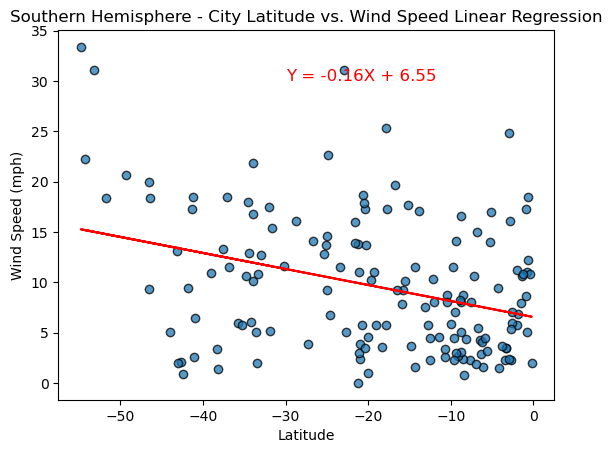

In [88]:
# Southern Hemisphere
# YOUR CODE HERE
# Southern Hemisphere DataFrame (Latitude < 0)에서 데이터 추출
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Perform linear regression
(slope, intercept, r_value, p_value, std_err) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])

# Calculate the regression line
regress_values = southern_hemi_df["Lat"] * slope + intercept

# Create scatter plot
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], edgecolors="black", alpha=0.75)

# Plot the regression line
plt.plot(southern_hemi_df["Lat"], regress_values, color="red")

# Set chart title and labels
plt.title("Southern Hemisphere - City Latitude vs. Wind Speed Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Display the correlation coefficient
print(f"Wind Speed vs. Latitude Linear on Northern Hemisphere r-value is:: {r_value}")

# Add regression equation as text in the plot
equation = f"Y = {slope:.2f}X + {intercept:.2f}"
plt.annotate(equation, (-30, 30), fontsize=12, color="red")

# Save the figure
plt.savefig("output_data/Southern_Hemisphere_Latitude_vs_Wind_Speed_Linear_Regression.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [89]:
# Print the summary of analysis results
print("In summary, temperature and latitude appear to be correlated, with opposing trends in the Northern and Southern Hemispheres.")
print("The other weather elements (humidity, cloudiness, and wind speed) show correlation coefficients below 0.5, suggesting a weaker or negligible relationship between them and latitude.")
print("")

# Detailed analysis for Temperature vs. Latitude
print("Temperature vs. Latitude:")
print("Among all the weather elements examined, only the correlation between temperature and latitude shows a significant relationship.")
print("For the Northern Hemisphere, there is a strong negative correlation (r-value: -0.86), indicating that as latitude increases, temperature tends to decrease. This suggests that in the Northern Hemisphere, regions at higher latitudes experience lower temperatures.")
print("In the Southern Hemisphere, a positive correlation (r-value: 0.72) is observed, indicating that as you move closer to the equator (lower latitude), temperatures tend to rise. This suggests that in the Southern Hemisphere, areas closer to the equator experience higher temperatures.")

In summary, temperature and latitude appear to be correlated, with opposing trends in the Northern and Southern Hemispheres.
The other weather elements (humidity, cloudiness, and wind speed) show correlation coefficients below 0.5, suggesting a weaker or negligible relationship between them and latitude.

Temperature vs. Latitude:
Among all the weather elements examined, only the correlation between temperature and latitude shows a significant relationship.
For the Northern Hemisphere, there is a strong negative correlation (r-value: -0.86), indicating that as latitude increases, temperature tends to decrease. This suggests that in the Northern Hemisphere, regions at higher latitudes experience lower temperatures.
In the Southern Hemisphere, a positive correlation (r-value: 0.72) is observed, indicating that as you move closer to the equator (lower latitude), temperatures tend to rise. This suggests that in the Southern Hemisphere, areas closer to the equator experience higher temperat